# Métodos no supervisados

No tienen etiquetas. Mientras que clasificar elefantes contra gatos es obvio para un humano, hay problemas mucho mas dificiles de clasficar sin etiquetas.
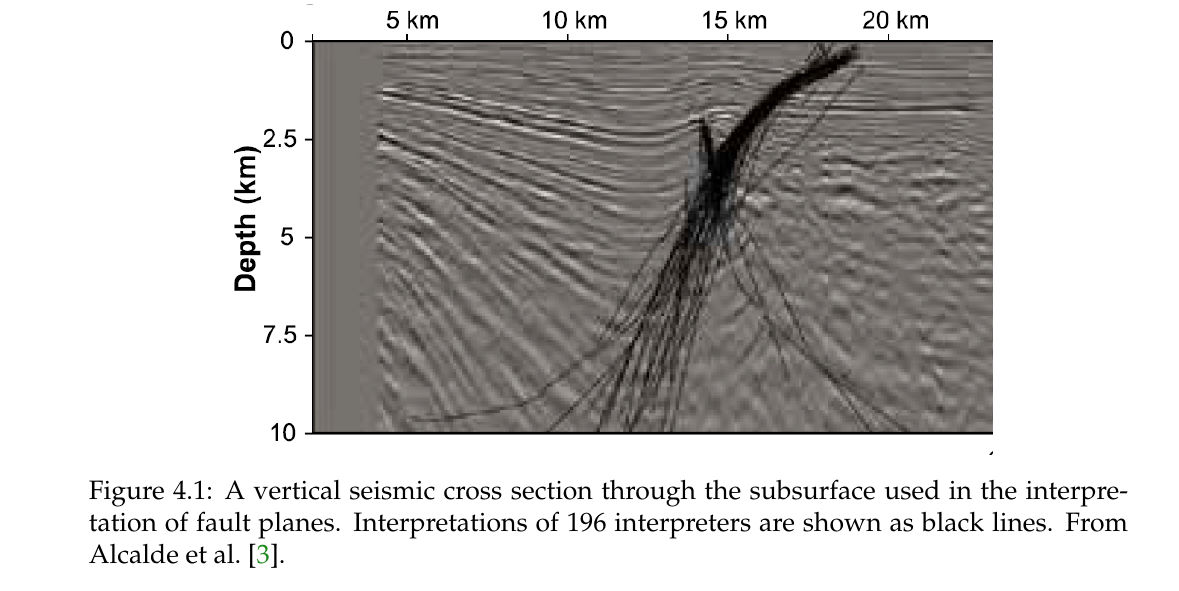

## Clustering: Agrupamiento. 
Tienes grupos y dentro de los grupos quieres dividirlos de acuerdo a ciertas caracteristicas. No es facil clasificar.
Por ejemplo el modelo de las casas, viviendas de area vs precio. Si no hay precio sino areas, el conjunto se ve como

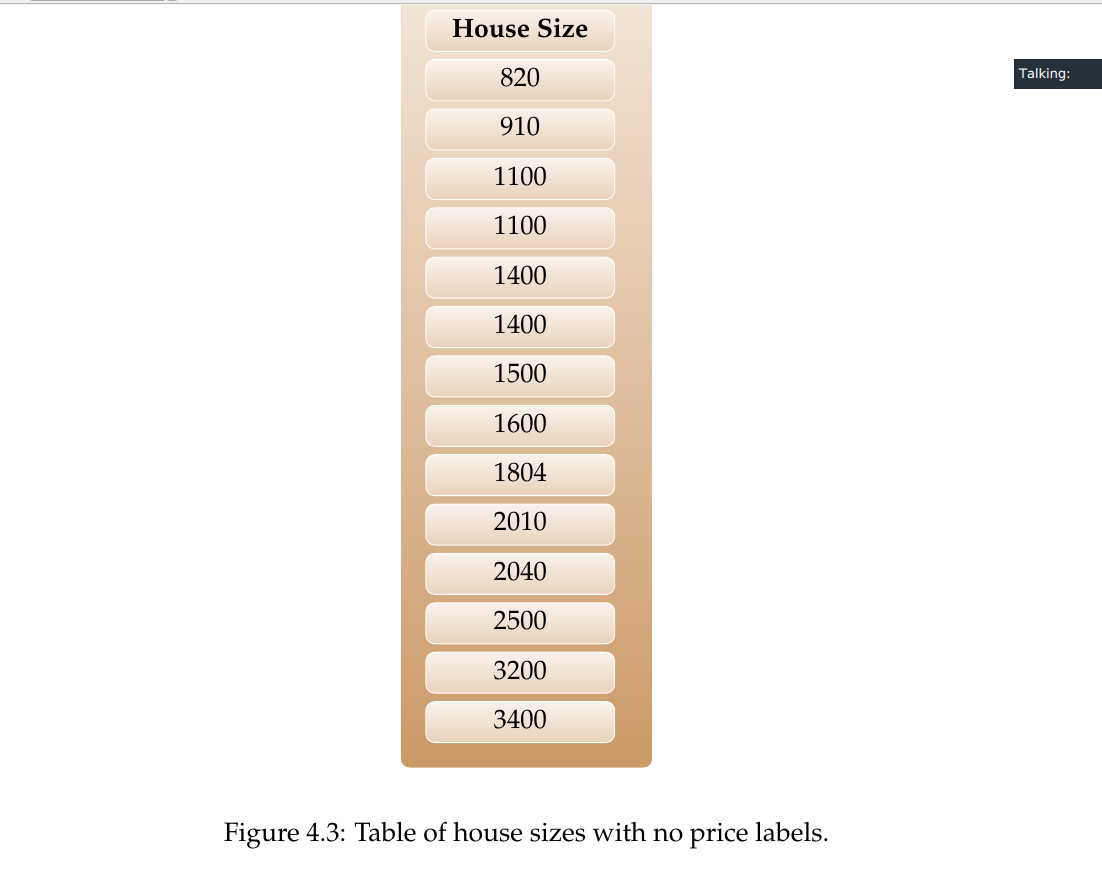

Una forma de ve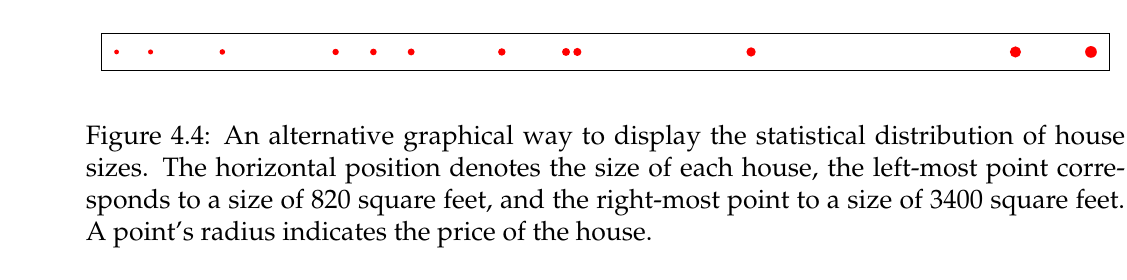r estos datos es la siguiente.


En la grafica de arriba las areas crecen de izquierda a derecha y el precio de la casa esta correlacionado con el diametro de los circulos. La pregunta es en cuantos grupos vamos a partir este conjunto y como?

Hay varios algoritmos para agrupar conjuntos de datos. En este curso, y por la falta de tiempo, solo veremos 

### K-means Clustering:

El agoritmo consiste en lo siguiente. Doy los pasos y luego con un ejemplo grafico los explico.

1. Lo primero a decidir es en cuantos grupos $k$ vamos a partir el conjunto. 
2. Una sabemos $k$, comenzamos localizano $k$ centros (no son centros, son puntos) aleatorios en el espacio de los datos. Son datos espaciales. 
3. Initializamos un vector de enteros $c$ de $m$ elementos donde cada elemento $c_i$ de $c$ indica el indice de su centro $c_1,c_2, c_3, c_1, c_1$, 
en este ejemplo $c_1$ esta mas cerca del centro 1, $c_3$ del centro 3 y asi sucesivamente. $c$ es una lista que asigna puntos a "centros".
Por ejemplo $c=[1,1,2,3,1,3,2,2]$ los puntos $x_1, x_2, x_5$ estan asociados
al "centro" $\mu_1$. 
4. Se halla el centro geometrico de cada grupo y este es el nuevo centro

$$ \mu_i = \frac{1}{|C_i|} \sum_{j=1}^{|C_i|} x_{c_i} $$.
5. Se repite desde el paso 3, se redibuja el vector $c$ de acuerdo a los nuevos centros y se halla el centro geometrico y asi suscesivamente. 



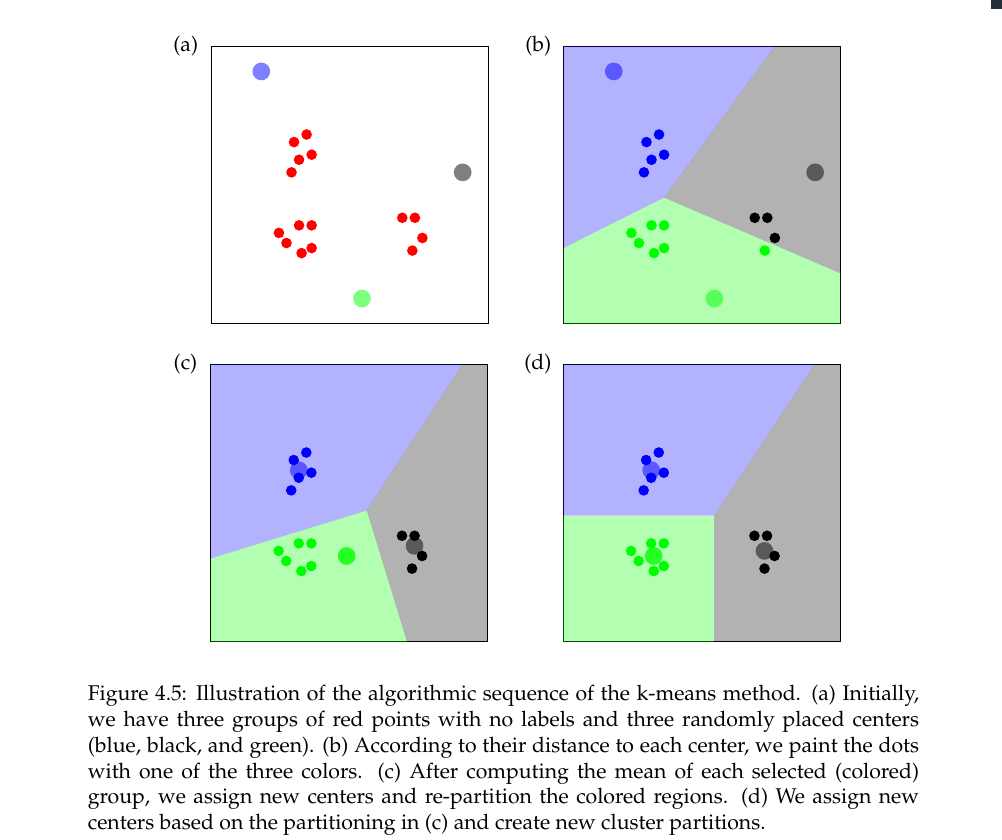

Como todos los problemas de ML que hemos visto, se debe definir una funcion de costo. Cual es la funcion de costo para k-means?

$$ J(x, c, \mu) = \sum_{i=1}^m \| x_i - \mu_{c_i}\|^2 $$
En el momento en que esta funcion de costo sea minima tenemos que los puntos estan mas "apiñados" posibles. 

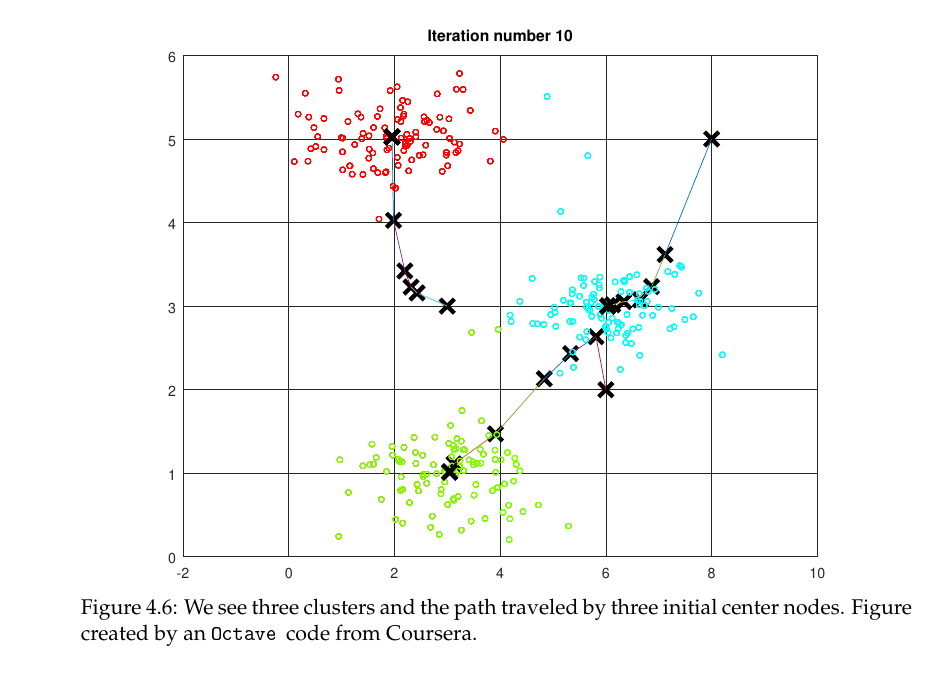

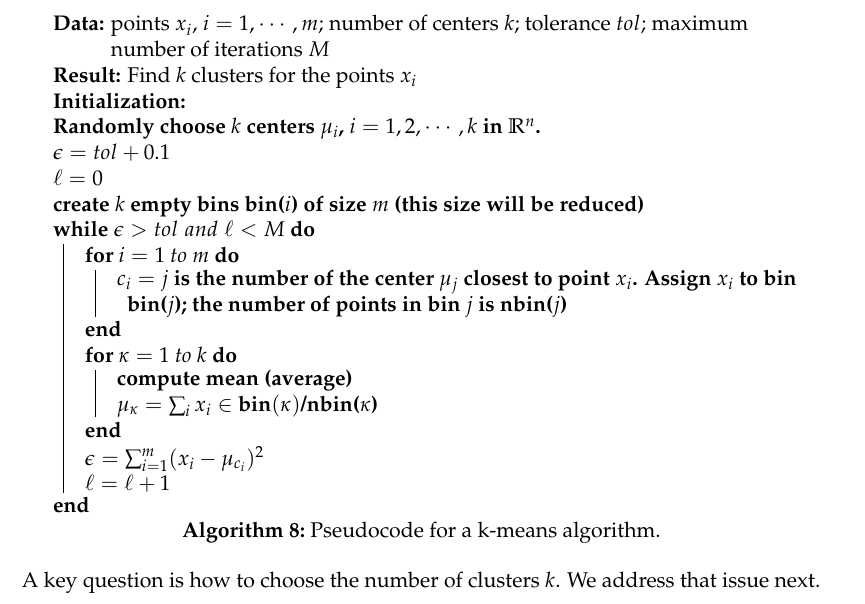

## Pregunta importante. Como determinar $k$?

Es facil cuando se tienen grupos separados. De otra forma no.
Necesitamoss estimar dos cosas:

i) En el mismo grupo los objetos deben de estar tan pegados como sea posible.

ii) Dos elementos de grupos distintos deben estar separados notoriamente.

Hay dos tipos (grandes) de determinar el numero optimo $k$ de clusters.

1. Metodos directos:
    * El metodo del codo
    * average silhouette  (silueta media). 
2. Metodos indirectos. (estadisticos). Funcionan con probabilidades. No los estudiamos aca.


### Metodo del codo (elbow method). 
Es muy intuitivo. Se calculans funciones de costo como funcion de 
$k$.

$$ J(k) = \sum_{i=1}^m \| x_i - \mu_{c_i} \|^2  \quad , \quad \mu_{c_i} \in \{\mu_1, \mu_2, \cdots, \mu_k \} $$
Aunque el $k$ no aparece en la derecha. 

Se grafica esta funcion de costo con respecto a $k$ y se senala el "codo"


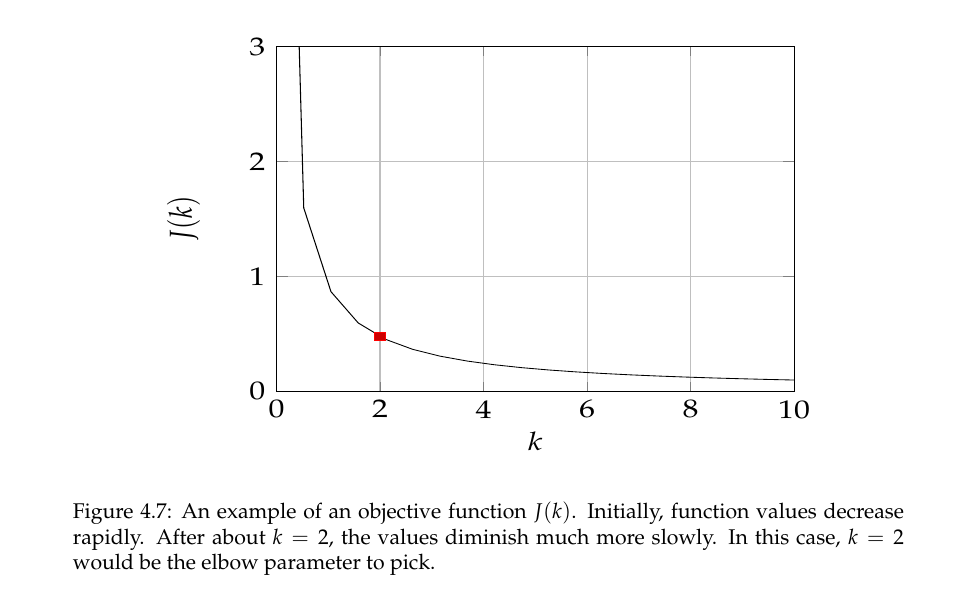

La funcion $J(k)$ es 0 cuando $k=m$. Pero este problema no es interesante. 
No se busca que $J(k)$ llegue a cero. Debemos parar antes, y el "codo" es el punto donde la relacion costo/benificio es maxima. 

El metodo del codo no es muy preciso y se usa en combinacion con otros metodos. 
Vamos a ver un metodo mucho mas cuantitativo y efectivo llamado

### The average Silhouette method (el metodo de la silueta media).

Vamos a usar dos conceptos utiles: **cohesion** y **separacion**.
La idea es que los puntos que estan en el mismo grupo esten tan juntos
como sea posible (cohesion) y que puntos de grupos distintos esten tan lejos como sea posible (separacion).

Definamos el "cluster" (grupo) $C_I$, $I=1,2, \cdots, k$ de la siguiente forma

$$ C_I = \{ x_{I1}, x_{I2} , \cdots , x_{Ik_i} \}$$
en este caso $k_i = | C_i |$, 

Definimos **cohesion** como el promedido de las distancias de un punto $x_i$ a todos sus **vecinos** (todos aquellos en el mismo "cluster" C_I). 

$$a_{iI} = \frac{1}{ |C_I| - 1} \sum_{j=1}^{k_j=C_I} d(x_{Ij}, x_{Ii})  $$

Hablemos ahora de separacion. Tambien es un promedio distancias entre un punto
$x_i$ en un grupo $C_I$ a otro grupo $C_J$, $I \ne J$. 

$$ \frac{1}{ | C_j |} \sum_{j=1}^{k_J} d(x_{iI}, x_{jJ})$$ la idea
es que este numero sea grande. 

El termino de separacion se define como


$$ b_{iI}  = \min_{J \ne I} \frac{1}{K_J} \sum_{j=1}^{k_J} d(x_{iI}, x_{jJ})  $$

Definimos ahora la **silueta**.

\begin{eqnarray}
s_{iI} = \left \{
    \begin{array}{c}
        \frac{b_{iI} - a_{iI}}{\max \{a_{iI}, b_{iI}\}} & \text{si } |C_I| > 1 \\
        0  & \text{si } | C_i| = 1
    \end{array}
    \right .
\end{eqnarray}

El denominador se introduce con el objeto de que la formula sea normalizada.
La silueta, para cada punto, en cada cluster, es un valor $-1 \le s_{iI} \le 1$. 

Que significan estos valores?

Matematicamente la silueta es una funcion:

\begin{eqnarray}
s : A &\to& [-1,1] \\
x_{iI} &\mapsto& s_{iI} 
\end{eqnarray}
no hay negativos si los puntos estan todos en su cluster respectivo 


[Python silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Los metodos estadisticos estan por fuera de esta clase.

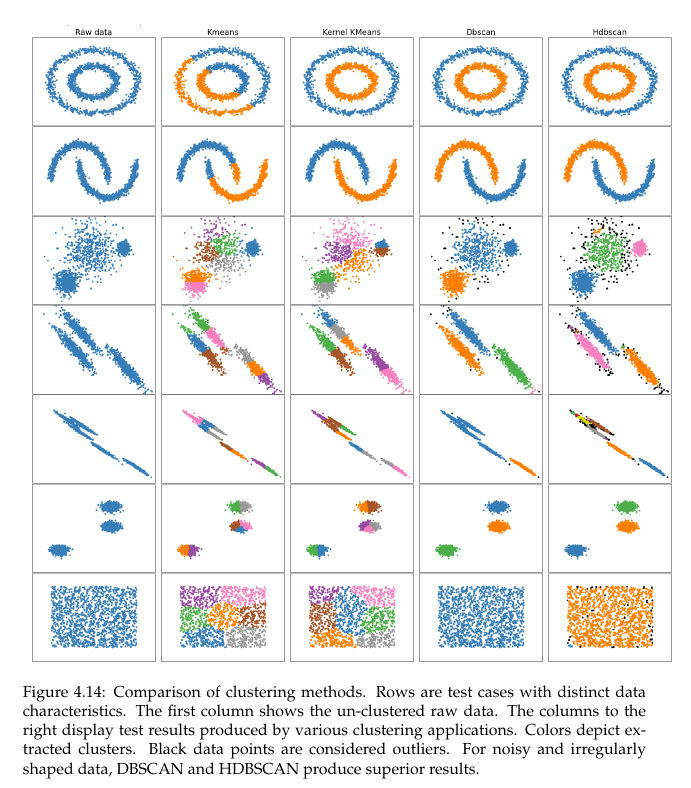